In [ ]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 2: SP500

### Historical Data

In [7]:
historical_period = "2013-2015"
prediction_period = "2015-2016"
index = "SP500"

query = '''
select * from SP500
where Date > "2013-06-01" and Date < "2015-07-01"
'''

data = pd.read_sql(query, conn)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
519,2015-06-24,2124,2125,2109,2109,2109,2147483647
520,2015-06-25,2110,2116,2102,2102,2102,2147483647
521,2015-06-26,2103,2109,2095,2101,2101,2147483647
522,2015-06-29,2099,2099,2057,2058,2058,2147483647
523,2015-06-30,2061,2074,2056,2063,2063,2147483647


In [8]:
global_slowdown_SP_historical = data[['Date', 'Close']]

In [9]:
#global_slowdown_SP_historical.to_sql(name = "global_slowdown_SP_historical", if_exists="append", con=conn, index=False)

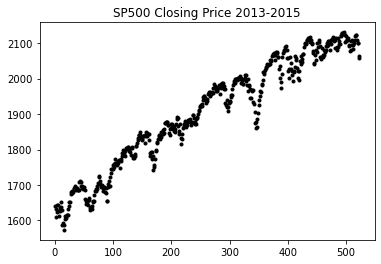

In [10]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline and Recovery

In [11]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
prediction.tail()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
884,2016-06-25,2256.831784,2091.277054,2376.745172,2120.041766,2404.357315,-28.410489,-28.410489,-28.410489,-32.583268,...,4.072909,4.072909,4.072909,0.099870,0.099870,0.099870,0.0,0.0,0.0,2228.421295
885,2016-06-26,2257.166346,2088.624903,2377.945771,2119.394198,2405.442137,-28.301042,-28.301042,-28.301042,-32.583268,...,4.072908,4.072908,4.072908,0.209318,0.209318,0.209318,0.0,0.0,0.0,2228.865304
886,2016-06-27,2257.500909,2088.042375,2368.296581,2118.777367,2406.535926,-34.186987,-34.186987,-34.186987,-32.583268,...,-2.192422,-2.192422,-2.192422,0.588703,0.588703,0.588703,0.0,0.0,0.0,2223.313922
887,2016-06-28,2257.835471,2081.771490,2373.566155,2118.409510,2407.530966,-33.844455,-33.844455,-33.844455,-32.583268,...,-2.491909,-2.491909,-2.491909,1.230722,1.230722,1.230722,0.0,0.0,0.0,2223.991016
888,2016-06-29,2258.170033,2084.970680,2378.800911,2118.270751,2408.500497,-32.794901,-32.794901,-32.794901,-32.583268,...,-2.333669,-2.333669,-2.333669,2.122036,2.122036,2.122036,0.0,0.0,0.0,2225.375132


In [12]:
global_slowdown_SP_predict = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper']]
global_slowdown_SP_predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
884,2016-06-25,2256.831784,2091.277054,2376.745172,2120.041766,2404.357315
885,2016-06-26,2257.166346,2088.624903,2377.945771,2119.394198,2405.442137
886,2016-06-27,2257.500909,2088.042375,2368.296581,2118.777367,2406.535926
887,2016-06-28,2257.835471,2081.771490,2373.566155,2118.409510,2407.530966
888,2016-06-29,2258.170033,2084.970680,2378.800911,2118.270751,2408.500497


In [14]:
#global_slowdown_SP_predict.to_sql(name = 'global_slowdown_SP_predict', if_exists='append', con=conn, index=False)

In [ ]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')